Let's Grow More

LGMVIP - Beginner Level Task - Iris Flower Classification 



**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


**Load Dataset**

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Dataset Description**

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Dataset Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Finding Null Values**

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Species Value**

In [8]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**Histogram**

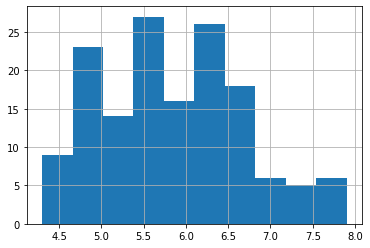

In [9]:
df['SepalLengthCm'].hist()

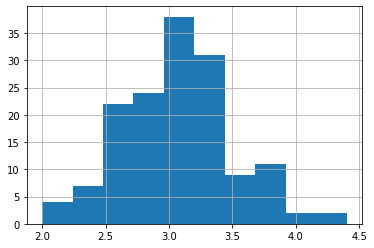

In [10]:
df['SepalWidthCm'].hist()

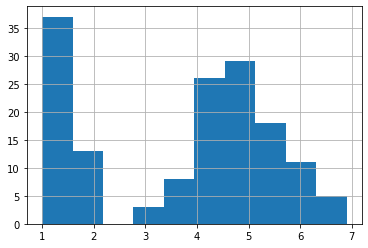

In [11]:
df['PetalLengthCm'].hist()

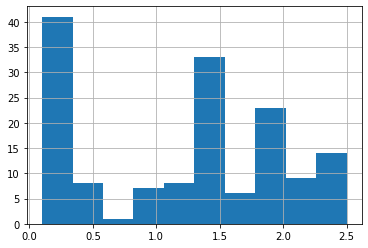

In [12]:
df['PetalWidthCm'].hist()

**ScatterPlot**

In [14]:
colors = ['purple', 'black', 'yellow']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

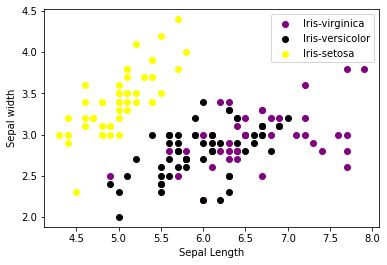

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal width")
    plt.legend()

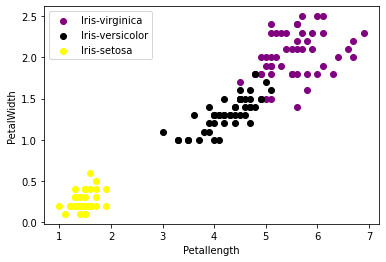

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("Petallength")
    plt.ylabel("PetalWidth")
    plt.legend()

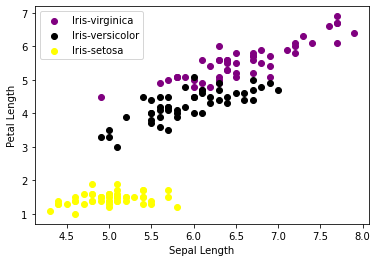

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

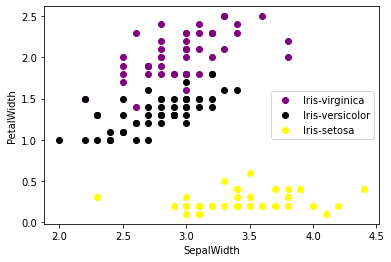

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("SepalWidth")
    plt.ylabel("PetalWidth")
    plt.legend()

In [19]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


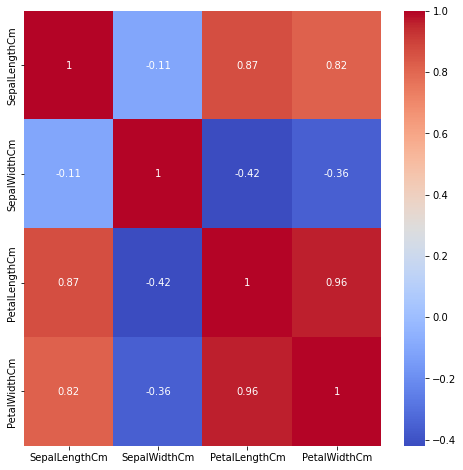

In [20]:
corr = df.corr()
fig, ax= plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Species'])
Y=df['Species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Accuracy - Logistic Regression**

In [26]:
print("Accuracy: " ,model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


**K Neighbors Classifier**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [28]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Accuracy - K Neighbors Classifier**

In [29]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


**Decision Tree Classifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Accuracy - Decision Tree Classifier**

In [32]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [ ]:
**Maximum accuracy - Logistic Regression, K Neighbors Classifier**
